In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import multiprocessing as multi
from datetime import datetime

In [2]:
print(datetime.now())

2021-08-10 17:07:12.266011


In [3]:
%%capture PC_name 
!hostname

In [8]:
#setting dots per inch for images
dpi = 120

#setting number of processors for multiprocessing
PC_name_str = PC_name.stdout[0:-2]

if (PC_name_str == 'science12'or PC_name_str == 'science11' or 
        PC_name_str == 'arc10'):
    cores = 42        
    
else:
    cores = multi.cpu_count()
    

print(PC_name_str)
print(cores)

arc10
42


In [9]:
data_address = '../Data/'

#massive_clusters.csv contains clusters with M_500c greater 
#than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_orig = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 
                                     'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 
                                     'vz[km/s]' ])  

df_clusters_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055
std,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388
min,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475
75%,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000
max,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000


(array([3249., 1331.,  626.,  154.,  677.,   36.,    5.]), array([3.e+13, 5.e+13, 7.e+13, 9.e+13, 1.e+14, 3.e+14, 5.e+14, 7.e+14]), <BarContainer object of 7 artists>)


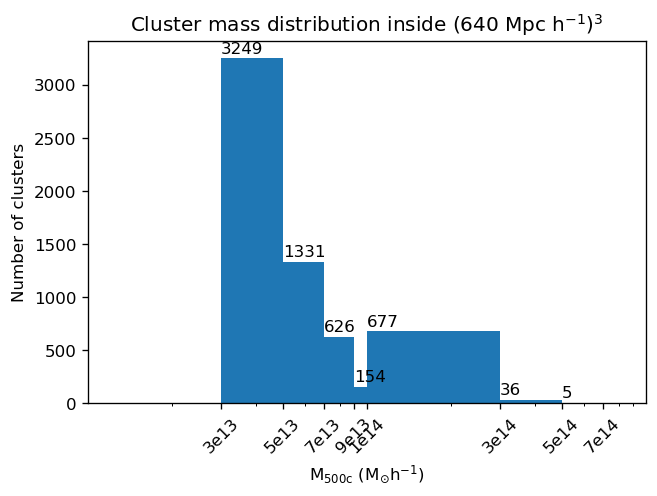

In [10]:
plt.figure(dpi = dpi)

bins = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins = ['3e13', '5e13', '7e13', '9e13', '1e14', '3e14', '5e14', '7e14']
plt.xticks(hist_data[1], bins, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+50,str(int(hist_data[0][i])));

(array([3249., 1331.,  626.,  154.,  578.,  140.]), array([3.e+13, 5.e+13, 7.e+13, 9.e+13, 1.e+14, 2.e+14, 7.e+14]), <BarContainer object of 6 artists>)


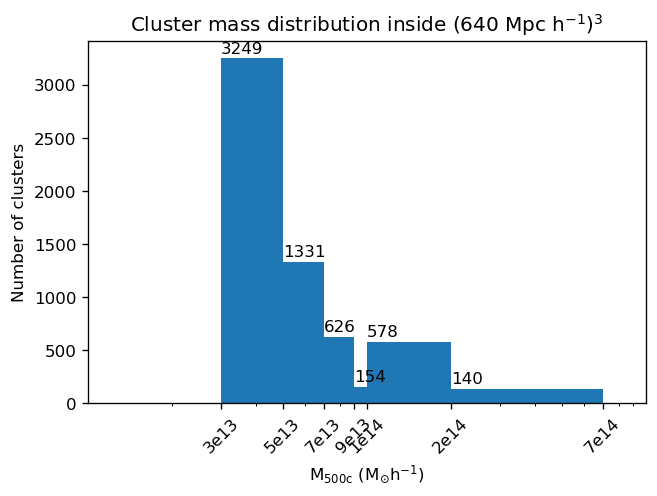

In [8]:
plt.figure(dpi = dpi)

bins = [3e13, 5e13, 7e13, 9e13, 1e14, 2e14, 7e14]
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins = ['3e13', '5e13', '7e13', '9e13', '1e14', '2e14', '7e14']
plt.xticks(hist_data[1], bins, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+50,str(int(hist_data[0][i])));

In [9]:
np.geomspace(3e13, 7e14, num = 8)

array([3.00000000e+13, 4.70485789e+13, 7.37856258e+13, 1.15716961e+14,
       1.81477286e+14, 2.84608279e+14, 4.46347169e+14, 7.00000000e+14])

(array([2933., 1803.,  833.,  330.,  130.,   39.,   10.]), array([3.00000000e+13, 4.70485789e+13, 7.37856258e+13, 1.15716961e+14,
       1.81477286e+14, 2.84608279e+14, 4.46347169e+14, 7.00000000e+14]), <BarContainer object of 7 artists>)


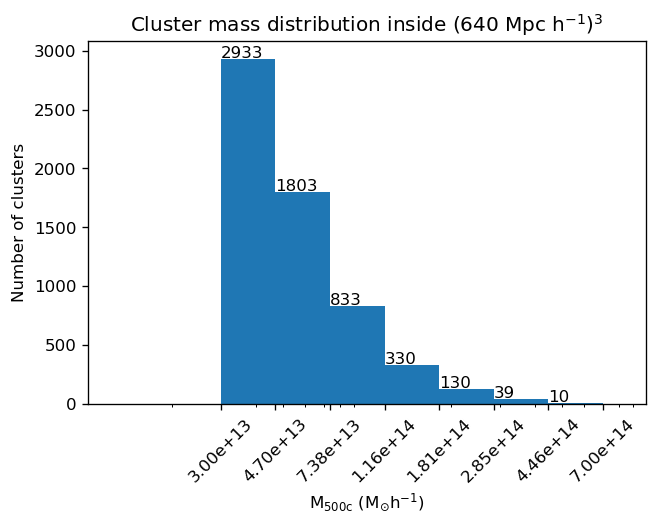

In [11]:
plt.figure(dpi = dpi)

bins = np.geomspace(3e13, 7e14, num = 8)
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins_str = ['{:.2e}'.format(i) for i in bins]
plt.xticks(hist_data[1], bins_str, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+10,str(int(hist_data[0][i])));
    


In [ ]:
df_clusters_orig.insert(4, 'log_m500c[Msol/h]', np.log10(df_clusters_orig['m500c[Msol/h]']), drop=True)


In [29]:
df_clusters_orig                    

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],log_m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
0,416658.590,455771.69,72710.742,7.438200e+14,14.871468,-484.1860,114.8290,-384.0200
1,457001.000,220719.88,279137.470,4.723990e+14,14.674309,-164.1060,315.2340,-225.1460
2,546352.060,317522.00,322111.530,5.932360e+14,14.773227,146.9470,317.5720,-158.6690
3,178209.080,431001.19,432031.660,7.220310e+14,14.858556,-112.3610,-193.4300,220.0250
4,232882.920,440987.19,452662.310,6.558890e+14,14.816830,117.8010,64.2292,92.0462
...,...,...,...,...,...,...,...,...
6075,398614.410,456990.94,59055.270,3.268890e+13,13.514400,251.9230,639.7280,81.2786
6076,91093.438,273545.50,560522.940,3.254110e+13,13.512432,-599.5290,210.0740,-221.3820
6077,410293.000,473990.06,380023.780,3.173150e+13,13.501491,453.3230,473.3080,-228.1020
6078,35722.242,600531.12,147710.950,3.230370e+13,13.509252,-34.4207,-447.3690,79.8294


(array([3261., 1674.,  723.,  277.,  112.,   26.,    7.]), array([13.5, 13.7, 13.9, 14.1, 14.3, 14.5, 14.7, 14.9]), <BarContainer object of 7 artists>)


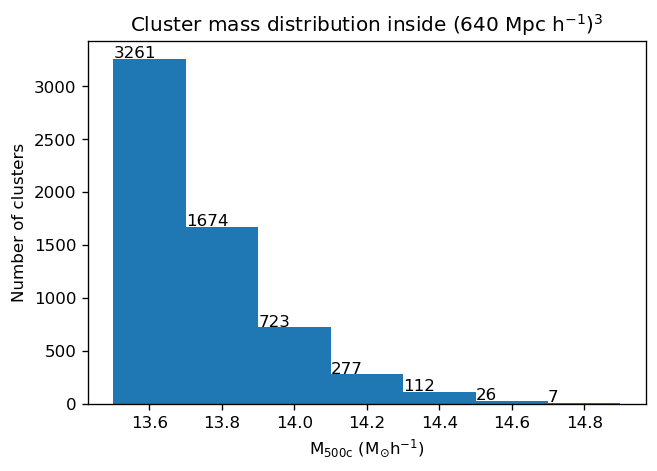

In [44]:
plt.figure(dpi = dpi)

# df_clusters_orig.insert(4, 'log_m500c[Msol/h]', np.log10(df_clusters_orig['m500c[Msol/h]'])


                        
bins = np.arange(13.5, df_clusters_orig['log_m500c[Msol/h]'].max() + 0.2, 0.2)
hist_data = plt.hist(df_clusters_orig['log_m500c[Msol/h]'],  bins = bins)
# plt.xlim(1e13, 1e15)
# plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

# bins_str = ['{:.2e}'.format(i) for i in bins]
# plt.xticks(hist_data[1], bins_str, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+10, str(int(hist_data[0][i])));
    


In [49]:
print(np.log10(df_clusters_orig['m500c[Msol/h]']).min())
print(np.log10(df_clusters_orig['m500c[Msol/h]']).max())


bins = np.arange(13.50, 14.31, 0.2)
print(np.append(bins, 14.9))
bins = np.append(bins, 14.9)
print(10**bins)

13.500008561417095
14.871467851587974
[13.5 13.7 13.9 14.1 14.3 14.9]
[3.16227766e+13 5.01187234e+13 7.94328235e+13 1.25892541e+14
 1.99526231e+14 7.94328235e+14]


(array([3261., 1674.,  723.,  277.,  112.,   26.,    7.]), array([3.16227766e+13, 5.01187234e+13, 7.94328235e+13, 1.25892541e+14,
       1.99526231e+14, 3.16227766e+14, 5.01187234e+14, 7.94328235e+14]), <BarContainer object of 7 artists>)


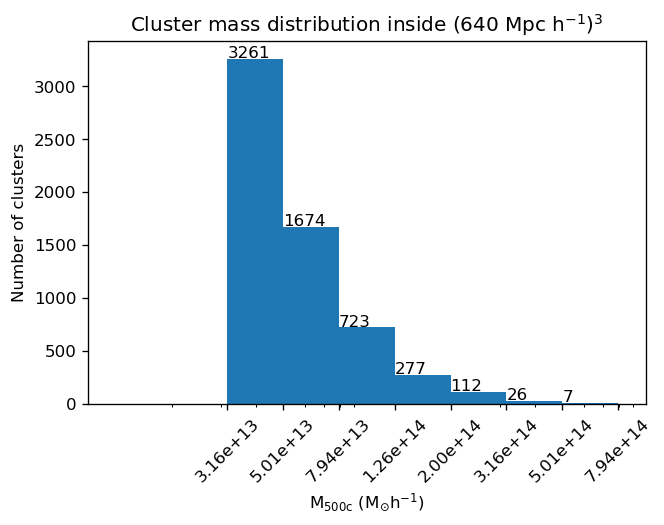

In [56]:
plt.figure(dpi = dpi)

# df_clusters_orig.insert(4, 'log_m500c[Msol/h]', np.log10(df_clusters_orig['m500c[Msol/h]'])


                        
bins = np.arange(13.5, df_clusters_orig['log_m500c[Msol/h]'].max() + 0.2, 0.2)
bins = 10**bins
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins_str = ['{:.2e}'.format(i) for i in bins]
plt.xticks(hist_data[1], bins_str, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+10, str(int(hist_data[0][i])));
    


(array([3171., 1667.,  767.,  300.,  126.,   37.,   10.]), array([3.16000000e+13, 4.91913394e+13, 7.65755656e+13, 1.19204261e+14,
       1.85563837e+14, 2.88864990e+14, 4.49672651e+14, 7.00000000e+14]), <BarContainer object of 7 artists>)


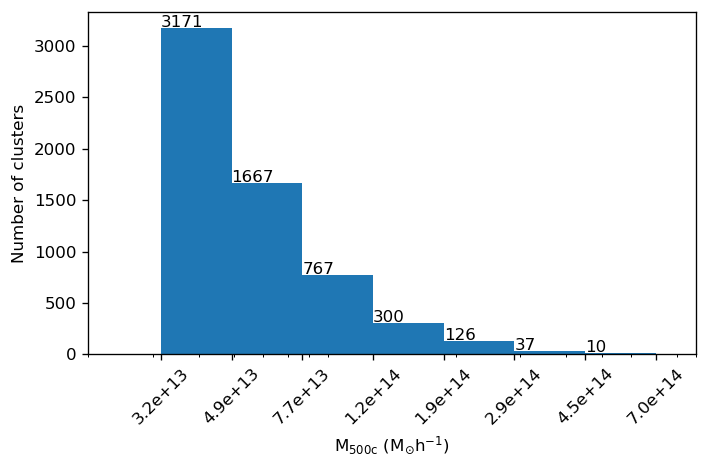

In [25]:
plt.figure(dpi = dpi)

bins = np.geomspace(3.16e13, 7e14, num = 8)
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(2e13, 9e14)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
# plt.title('Cluster mass distribution');

bins_str = ['{:.1e}'.format(i) for i in bins]
plt.xticks(hist_data[1], bins_str, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+10,str(int(hist_data[0][i])));
    
plt.tight_layout()
plt.savefig('Plots/clus_hist.pdf')

(array([3780., 1686.,  468.,  124.,   20.]), array([3.00000000e+13, 5.63269988e+13, 1.05757693e+14, 1.98567115e+14,
       3.72822988e+14, 7.00000000e+14]), <BarContainer object of 5 artists>)


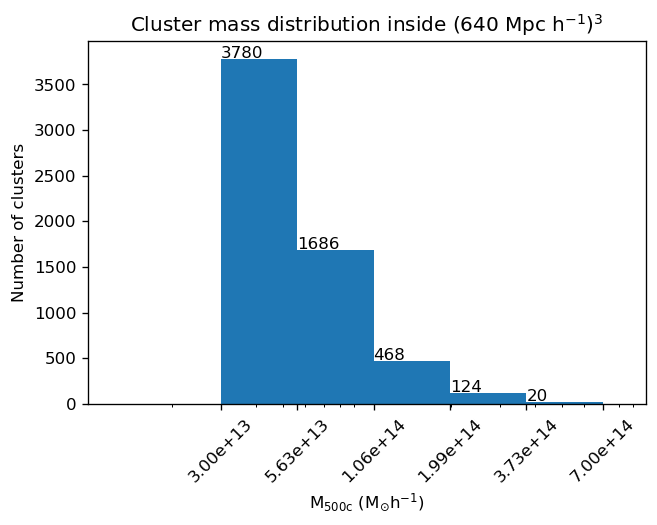

In [12]:
plt.figure(dpi = dpi)

bins = np.geomspace(3e13, 7e14, num = 6)
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins_str = ['{:.2e}'.format(i) for i in bins]
plt.xticks(hist_data[1], bins_str, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+10,str(int(hist_data[0][i])));

(array([5103.,  904.,   71.]), array([3.00000000e+13, 8.57261888e+13, 2.44965982e+14, 7.00000000e+14]), <BarContainer object of 3 artists>)


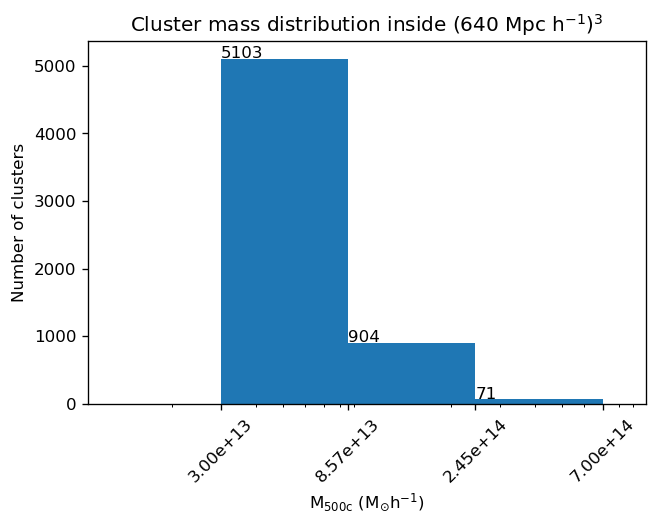

In [11]:
plt.figure(dpi = dpi)

bins = np.geomspace(3e13, 7e14, num = 4)
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins_str = ['{:.2e}'.format(i) for i in bins]
plt.xticks(hist_data[1], bins_str, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+10,str(int(hist_data[0][i])));

In [11]:
df_clusters_temp = df_clusters_orig.copy()

df_clusters_big = pd.DataFrame()

for k in range(3):
    for i in range(3):
        for j in range(0,3):

            df_clusters_temp['x[kpc/h]'] = df_clusters_orig['x[kpc/h]'] + (640000 * i)
            df_clusters_temp['y[kpc/h]'] = df_clusters_orig['y[kpc/h]'] + (640000 * j)
            df_clusters_temp['z[kpc/h]'] = df_clusters_orig['z[kpc/h]'] + (640000 * k)

            df_clusters_big = df_clusters_big.append(df_clusters_temp)

df_clusters_big.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,1.641600e+05,1.641600e+05,1.641600e+05,1.641600e+05,164160.000000,164160.000000,164160.000000
mean,9.664164e+05,9.620554e+05,9.613082e+05,6.356245e+13,2.109102,-1.647297,-4.296055
std,5.546773e+05,5.535561e+05,5.538918e+05,4.851314e+13,316.039508,306.202286,286.431703
min,1.916329e+01,1.526539e+02,8.737095e+01,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,4.863366e+05,4.736062e+05,4.789278e+05,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,9.788846e+05,9.732743e+05,9.621101e+05,4.801630e+13,-3.619450,1.969450,-8.055475
75%,1.440918e+06,1.444771e+06,1.441655e+06,6.945502e+13,206.816750,207.755750,181.532000
max,1.919888e+06,1.919933e+06,1.919848e+06,7.438200e+14,1197.640000,1164.960000,1201.260000


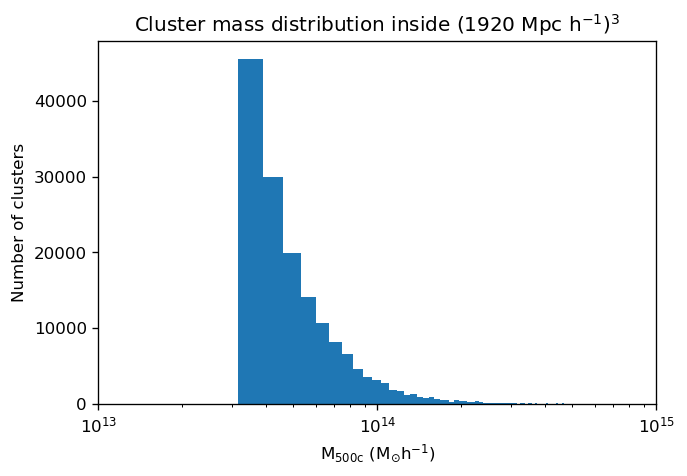

In [23]:
plt.figure(dpi = dpi)
plt.hist(df_clusters_big['m500c[Msol/h]'],  bins = 100)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (1920 Mpc h$^{-1}$)$^3$');

In [12]:
low_bound = 640000
upp_bound = 640000 * 2  #128000

df_clusters_center = df_clusters_big[(df_clusters_big['x[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['x[kpc/h]'] < upp_bound) & 
                                     (df_clusters_big['y[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['y[kpc/h]'] < upp_bound) & 
                                     (df_clusters_big['z[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['z[kpc/h]'] < upp_bound)]

df_clusters_center.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6.080000e+03,6.080000e+03,6.080000e+03,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,9.664164e+05,9.620554e+05,9.613082e+05,6.356245e+13,2.109102,-1.647297,-4.296055
std,1.860216e+05,1.826509e+05,1.836659e+05,4.851698e+13,316.064539,306.226537,286.454388
min,6.400192e+05,6.401527e+05,6.400874e+05,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,8.009786e+05,8.047934e+05,8.018639e+05,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,9.788846e+05,9.732743e+05,9.621101e+05,4.801630e+13,-3.619450,1.969450,-8.055475
75%,1.126228e+06,1.113557e+06,1.118894e+06,6.945502e+13,206.816750,207.755750,181.532000
max,1.279888e+06,1.279933e+06,1.279848e+06,7.438200e+14,1197.640000,1164.960000,1201.260000


In [13]:
%%time

#massive_galaxies.csv contains galaxies with mass greater than 
#1.8 ×10^{11} h^{−1} M_sun as done by Tanimura et al. (2020)

df_gal_orig = pd.read_csv(data_address + 'massive_galaxies_10_10.csv')      
df_gal_orig.describe()

CPU times: user 3.81 s, sys: 464 ms, total: 4.28 s
Wall time: 4.45 s


,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],host,dist[kpc/h],vx[km/s],vy[km/s],vz[km/s]
count,3.678431e+06,3.678431e+06,3.678431e+06,3.678431e+06,3.678431e+06,3.678431e+06,3.678431e+06,3.678431e+06,3.678431e+06
mean,3.231623e+05,3.213125e+05,3.203307e+05,4.091361e+10,5.225362e+04,4.724418e+01,-3.848629e-01,2.138708e-01,7.666311e-02
std,1.850387e+05,1.834972e+05,1.836340e+05,8.963719e+10,1.437019e+04,1.686937e+02,3.562749e+02,3.498227e+02,3.336928e+02
min,2.472523e-02,4.139575e-02,1.757775e-01,1.000010e+10,0.000000e+00,0.000000e+00,-3.890077e+03,-3.448558e+03,-3.414454e+03
25%,1.614168e+05,1.635298e+05,1.616021e+05,1.731070e+10,5.723700e+04,0.000000e+00,-2.255566e+02,-2.198906e+02,-2.071114e+02
50%,3.277754e+05,3.255006e+05,3.202183e+05,2.291080e+10,5.723700e+04,0.000000e+00,-5.377200e+00,2.296509e+00,-5.732940e-01
75%,4.823795e+05,4.765793e+05,4.785357e+05,3.694520e+10,5.723700e+04,0.000000e+00,2.205335e+02,2.203445e+02,2.064592e+02
max,6.399998e+05,6.399998e+05,6.399998e+05,1.077460e+13,5.723700e+04,2.689410e+03,3.089348e+03,3.447494e+03,3.245993e+03


In [13]:
# plt.figure(dpi = dpi)

# bins = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
# hist_data = plt.hist(df_gal_orig['m500c[Msol/h]'],  bins = bins)
# plt.xlim(1e13, 1e15)
# plt.xscale('log')
# plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
# plt.ylabel('Number of clusters')
# plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

# bins = ['3e13', '5e13', '7e13', '9e13', '1e14', '3e14', '5e14', '7e14']
# plt.xticks(hist_data[1], bins, rotation = 45)
# # plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# # plt.ylim(0,200)
# print(hist_data)
# for i in range(len(hist_data[0])):
#     plt.text(hist_data[1][i],hist_data[0][i]+50,str(int(hist_data[0][i])));

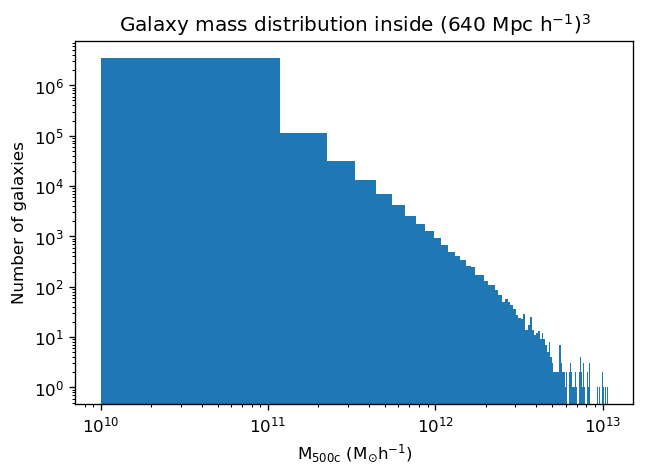

In [24]:
plt.figure(dpi = dpi)

bins = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
hist_data = plt.hist(df_gal_orig['m[Msol/h]'], bins = 100)
# hist_data = plt.hist(df_gal_orig['m[Msol/h]'],  bins = bins)
# plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of galaxies')
plt.title('Galaxy mass distribution inside (640 Mpc h$^{-1}$)$^3$');

# bins = ['3e13', '5e13', '7e13', '9e13', '1e14', '3e14', '5e14', '7e14']
# plt.xticks(hist_data[1], bins, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
# print(hist_data)
# for i in range(len(hist_data[0])):
#     plt.text(hist_data[1][i],hist_data[0][i]+50,str(int(hist_data[0][i])));

In [ ]:
%%time
print(datetime.now())
df_gal_temp = df_gal_orig.copy()

df_gal_big = pd.DataFrame()

for k in range(3):
    for i in range(3):
        for j in range(0,3):

            df_gal_temp['x[kpc/h]'] = df_gal_orig['x[kpc/h]'] + (640000 * i)
            df_gal_temp['y[kpc/h]'] = df_gal_orig['y[kpc/h]'] + (640000 * j)
            df_gal_temp['z[kpc/h]'] = df_gal_orig['z[kpc/h]'] + (640000 * k)

            df_gal_big = df_gal_big.append(df_gal_temp)

df_gal_big.describe()

2021-08-10 17:55:52.192353


In [16]:
%%time
df_gal_big['r_mag[kpc/h]'] = np.sqrt(df_gal_big['x[kpc/h]']**2 +
                                     df_gal_big['y[kpc/h]']**2 +
                                     df_gal_big['z[kpc/h]']**2)
        
        
df_gal_big['v_los[km/s]'] = (((df_gal_big['vx[km/s]'] * df_gal_big['x[kpc/h]']) +
                              (df_gal_big['vy[km/s]'] * df_gal_big['y[kpc/h]']) +
                              (df_gal_big['vz[km/s]'] * df_gal_big['z[kpc/h]'])) /
                               df_gal_big['r_mag[kpc/h]'])
df_gal_big.describe()

CPU times: user 1min 26s, sys: 7.58 s, total: 1min 34s
Wall time: 31.4 s


,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],vx[km/s],vy[km/s],vz[km/s],r_mag[kpc/h],v_los[km/s]
count,9.931764e+07,9.931764e+07,9.931764e+07,9.931764e+07,9.931764e+07,9.931764e+07,9.931764e+07,9.931764e+07,9.931764e+07
mean,9.631623e+05,9.613125e+05,9.603307e+05,4.091361e+10,-3.848629e-01,2.138708e-01,7.666311e-02,1.846695e+06,-5.365458e+00
std,5.543518e+05,5.538392e+05,5.538846e+05,8.963717e+10,3.562749e+02,3.498227e+02,3.336928e+02,5.334681e+05,3.438648e+02
min,2.472523e-02,4.139575e-02,1.757775e-01,1.000010e+10,-3.890077e+03,-3.448558e+03,-3.414454e+03,9.506466e+03,-4.058818e+03
25%,4.823797e+05,4.765794e+05,4.785357e+05,1.731070e+10,-2.255567e+02,-2.198907e+02,-2.071115e+02,1.503170e+06,-2.185570e+02
50%,9.677754e+05,9.655006e+05,9.602183e+05,2.291080e+10,-5.377200e+00,2.296509e+00,-5.732940e-01,1.893136e+06,-5.790859e+00
75%,1.441417e+06,1.443530e+06,1.441602e+06,3.694520e+10,2.205335e+02,2.203446e+02,2.064593e+02,2.228931e+06,2.074013e+02
max,1.920000e+06,1.920000e+06,1.920000e+06,1.077460e+13,3.089348e+03,3.447494e+03,3.245993e+03,3.315052e+06,3.559524e+03


In [17]:
def velocity_disp_along_los(gray_shade, low_lim, upper_lim, df_clusters_inner, 
                            radi, max_extent):
       
    v_disp_los = np.zeros((n_clusters, radi.shape[0]))
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, 
                                               random_state = 0)    
    
    random_clusters = random_clusters.reset_index(drop = True)
    
    for j, random_cluster in random_clusters.iterrows():
        
        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', 
                           df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        df_gal_cube.insert(4, 'y_shift[kpc/h]', 
                           df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        df_gal_cube.insert(5, 'z_shift[kpc/h]', 
                           df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', 
                           np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                   df_gal_cube['y_shift[kpc/h]']**2 +
                                   df_gal_cube['z_shift[kpc/h]']**2))
  

        for i, r in enumerate(radi):

            df_gal_sphere = df_gal_cube[df_gal_cube['dist_from_clus'] <= r]


            v_disp_los[j,i] = np.std(df_gal_sphere['v_los[km/s]'])
        
        
    return v_disp_los.mean(axis = 0), low_lim, upper_lim

CPU times: user 537 ms, sys: 2.66 s, total: 3.2 s
Wall time: 2min 43s


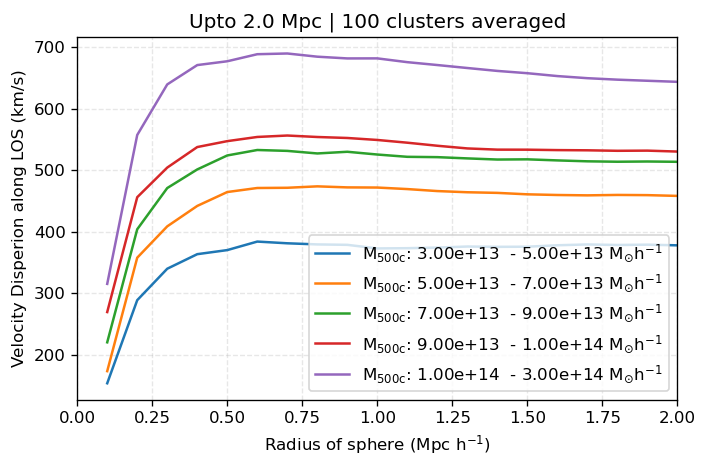

In [38]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 2000
radi = np.arange(100, max_extent + 1, 100)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
    
       
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    
#     break

pool = multi.Pool(processes = cores)
results = pool.starmap(velocity_disp_along_los, param_list)

for result in results:
    v_disp_los, low_lim, upper_lim = result
    
    plt.plot(radi/1e3, v_disp_los, 
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
 
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Velocity Disperion along LOS (km/s)')
plt.legend()
# plt.ylim(400,)
plt.xlim(0, max_extent/1e3)



plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 391 ms, sys: 2.08 s, total: 2.47 s
Wall time: 2min 55s


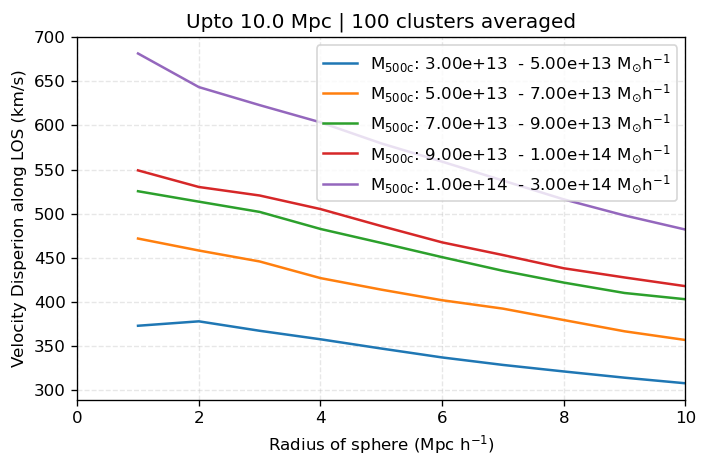

In [39]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 10000
radi = np.arange(1000, max_extent + 1, 1000)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
       
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    
#     break

pool = multi.Pool(processes = cores)
results = pool.starmap(velocity_disp_along_los, param_list)

for result in results:
    v_disp_los, low_lim, upper_lim = result
    
    plt.plot(radi/1e3, v_disp_los, 
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
 
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Velocity Disperion along LOS (km/s)')
plt.legend()
# plt.ylim(400,)
plt.xlim(0, max_extent/1e3)



plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 344 ms, sys: 1.81 s, total: 2.16 s
Wall time: 11min 31s


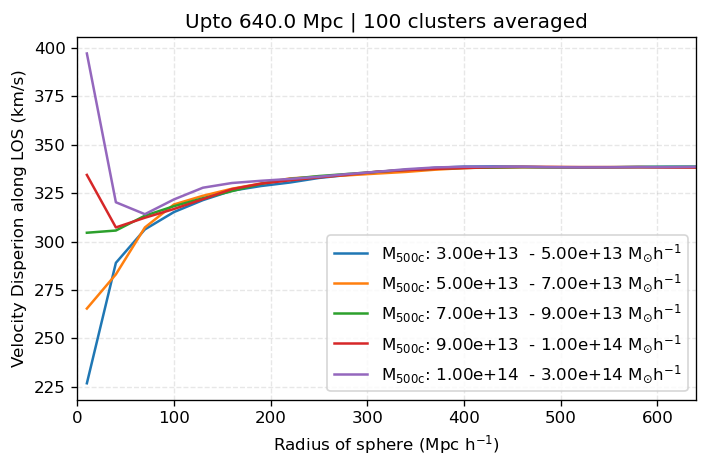

In [29]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 640000
radi = np.arange(10000, max_extent + 1, 30000)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
    
#     if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
#                               (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
#         print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
#         continue
    
#     velocity_disp_along_los(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
#                                     df_clusters_center[
#                                     (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
#                                     (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
#                                     radi, max_extent)
    
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    
#     break

pool = multi.Pool(processes = cores)
results = pool.starmap(velocity_disp_along_los, param_list)

for result in results:
    v_disp_los, low_lim, upper_lim = result
    
    plt.plot(radi/1e3, v_disp_los, 
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Velocity Disperion along LOS (km/s)')
plt.legend()
# plt.ylim(400,)
plt.xlim(0, max_extent/1e3)



plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')`

In [18]:
def velocity_disp_along_los_bin(gray_shade, low_lim, upper_lim, 
                                df_clusters_inner, radi, max_extent):
       
    v_disp_los = np.zeros((n_clusters, radi.shape[0]-1))
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, 
                                               random_state = 0)  
    
    random_clusters = random_clusters.reset_index(drop = True)
    
    for j, random_cluster in random_clusters.iterrows():
        
        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', 
                           df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        df_gal_cube.insert(4, 'y_shift[kpc/h]', 
                           df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        df_gal_cube.insert(5, 'z_shift[kpc/h]', 
                           df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', 
                           np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                   df_gal_cube['y_shift[kpc/h]']**2 +
                                   df_gal_cube['z_shift[kpc/h]']**2))
  

        for i, r in enumerate(radi[:-1]):

            df_gal_sphere = df_gal_cube[(df_gal_cube['dist_from_clus'] >= radi[i]) & 
                                        (df_gal_cube['dist_from_clus'] < radi[i+1])]

            v_disp_los[j,i] = np.nanstd(df_gal_sphere['v_los[km/s]'], ddof = 1)
        
        
    return np.nanmean(v_disp_los, axis = 0, ddof = 1), low_lim, upper_lim

In [ ]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 2000
radi = np.arange(0, max_extent + 1, 200)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
    
        
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    
#     break

pool = multi.Pool(processes = cores)
results = pool.starmap(velocity_disp_along_los_bin, param_list)

for result in results:
    v_disp_los, low_lim, upper_lim = result
    
    plt.plot(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, v_disp_los, 
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
 
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Velocity Disperion along LOS (km/s)')
plt.legend()
# plt.ylim(400,)
plt.xlim(0, max_extent/1e3)



plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

In [ ]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 10000
radi = np.arange(0, max_extent + 1, 1000)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
    
    
#     velocity_disp_along_los(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
#                                     df_clusters_center[
#                                     (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
#                                     (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
#                                     radi, max_extent)
    
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    
#     break

pool = multi.Pool(processes = cores)
results = pool.starmap(velocity_disp_along_los_bin, param_list)

for result in results:
    v_disp_los, low_lim, upper_lim = result
    
    plt.plot(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, v_disp_los, 
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
 
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Velocity Disperion along LOS (km/s)')
plt.legend()
# plt.ylim(400,)
plt.xlim(0, max_extent/1e3)



plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

In [31]:
def bulk_velocity_with_mass_mag_only(gray_shade, low_lim, upper_lim, df_clusters_inner, radi, max_extent):

    v_bulk_x = np.zeros(radi.shape)
    v_bulk_y = np.zeros(radi.shape)
    v_bulk_z = np.zeros(radi.shape)
        
    v_bulk_mag = np.zeros((n_clusters, radi.shape[0]))
#     gal_no = np.zeros(n_clusters, radi.shape)
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, random_state = 0)    
    random_clusters = random_clusters.reset_index(drop = True)
    
    for j, random_cluster in random_clusters.iterrows():
        
        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        df_gal_cube.insert(4, 'y_shift[kpc/h]', df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        df_gal_cube.insert(5, 'z_shift[kpc/h]', df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                                        df_gal_cube['y_shift[kpc/h]']**2 +
                                                        df_gal_cube['z_shift[kpc/h]']**2))
  

        for i, r in enumerate(radi):

            df_gal_sphere = df_gal_cube[df_gal_cube['dist_from_clus'] <= r]

            v_gal_sphere_mag = np.sqrt(df_gal_sphere['vx[km/s]']**2 +  
                                       df_gal_sphere['vy[km/s]']**2 +
                                       df_gal_sphere['vz[km/s]']**2)
            
#             v_bulk_mag[j,i] = (np.sum(df_gal_sphere['m[Msol/h]'] * v_gal_sphere_mag) / 
#                                np.sum(df_gal_sphere['m[Msol/h]']))
            
            v_bulk_mag[j,i] = np.sum(v_gal_sphere_mag) / len(df_gal_sphere)
        
            
    
    
#             v_bulk_x[i] = (np.sum(df_gal_sphere['vx[km/s]'] * df_gal_sphere['m[Msol/h]']) / 
#                                np.sum(df_gal_sphere['m[Msol/h]']))


#             v_bulk_y[i] = (np.sum(df_gal_sphere['vy[km/s]'] * df_gal_sphere['m[Msol/h]']) / 
#                                np.sum(df_gal_sphere['m[Msol/h]']))


#             v_bulk_z[i] = (np.sum(df_gal_sphere['vz[km/s]'] * df_gal_sphere['m[Msol/h]']) / 
#                                np.sum(df_gal_sphere['m[Msol/h]']))



#         v_bulk_mag[j,:] = np.sqrt(v_bulk_x**2 + v_bulk_y**2 + v_bulk_z**2)
    
    
    plt.plot(radi/1e3, v_bulk_mag.mean(axis = 0), 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')

CPU times: user 1min 1s, sys: 1.64 s, total: 1min 2s
Wall time: 35.6 s


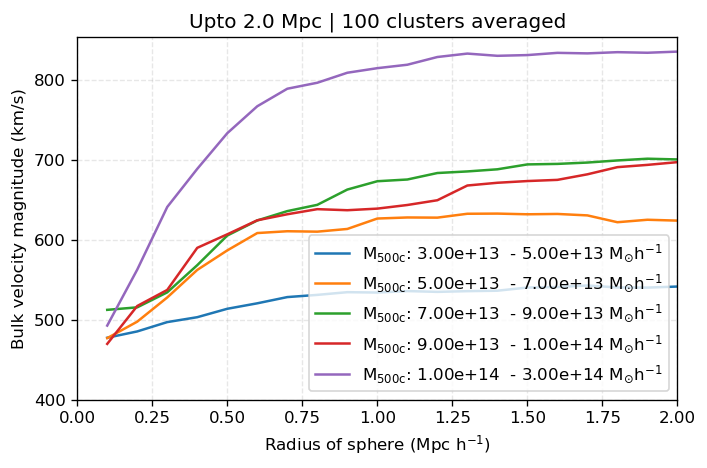

In [32]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 2000
radi = np.arange(100, max_extent + 1, 100)

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_with_mass_mag_only(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
plt.ylim(400,)
plt.xlim(0, max_extent/1e3)



plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 35.1 s, sys: 647 ms, total: 35.8 s
Wall time: 15.9 s


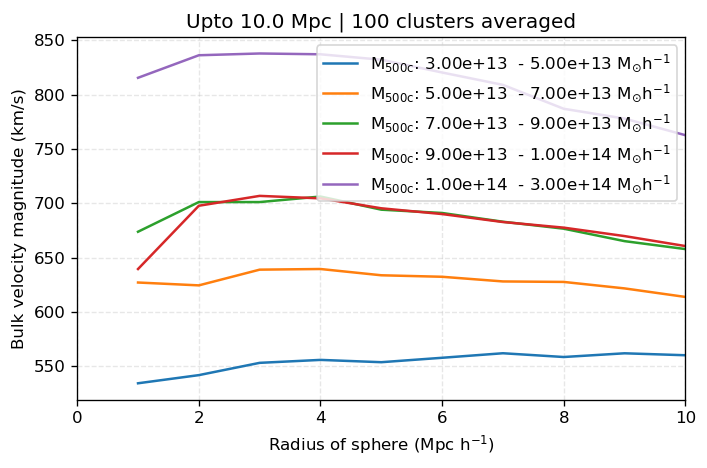

In [44]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

max_extent = 10000
radi = np.arange(1000, max_extent + 1, 1000)

n_clusters = 100
# n_clusters = 2

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_with_mass_mag_only(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
# plt.ylim(0, 700)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 44 s, sys: 1.16 s, total: 45.2 s
Wall time: 23 s


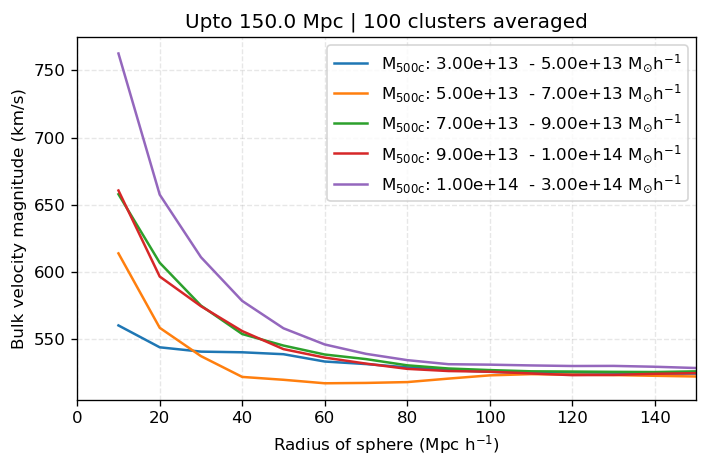

In [43]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

max_extent = 150000
radi = np.arange(10000, max_extent + 1, 10000)

n_clusters = 100
# n_clusters = 2

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_with_mass_mag_only(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
# plt.ylim(400, 700)
plt.xlim(0, 150)



plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

In [20]:
max_extent = 640000
radi = np.arange(10000, max_extent + 1, 30000)
print(radi)

[ 10000  40000  70000 100000 130000 160000 190000 220000 250000 280000
 310000 340000 370000 400000 430000 460000 490000 520000 550000 580000
 610000 640000]


In [54]:
def velocity_dispersion(gray_shade, low_lim, upper_lim, df_clusters_inner, radi, max_extent):
    
        
    v_disp = np.zeros((n_clusters, radi.shape[0]))
    gal_no = np.zeros((n_clusters, radi.shape[0]))
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, random_state = 0)    
    random_clusters = random_clusters.reset_index(drop = True)
    
    for j, random_cluster in random_clusters.iterrows():
        
        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        df_gal_cube.insert(4, 'y_shift[kpc/h]', df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        df_gal_cube.insert(5, 'z_shift[kpc/h]', df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                                        df_gal_cube['y_shift[kpc/h]']**2 +
                                                        df_gal_cube['z_shift[kpc/h]']**2))
  

        for i, r in enumerate(radi):

            df_gal_sphere = df_gal_cube[df_gal_cube['dist_from_clus'] <= r]

            v_gal_sphere_mag = np.sqrt(df_gal_sphere['vx[km/s]']**2 +  
                                       df_gal_sphere['vy[km/s]']**2 +
                                       df_gal_sphere['vz[km/s]']**2)
            
            v_disp[j,i] = np.std(v_gal_sphere_mag)
            
#             gal_no[j,i] = len(df_gal_sphere)
    
    
    plt.plot(radi/1e3, v_disp.mean(axis = 0), 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    
#     plt.plot(radi/1e3, gal_no.mean(axis = 0), 
# #              c = gray_shade,
#              label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    
    

CPU times: user 38.6 s, sys: 521 ms, total: 39.1 s
Wall time: 20.5 s


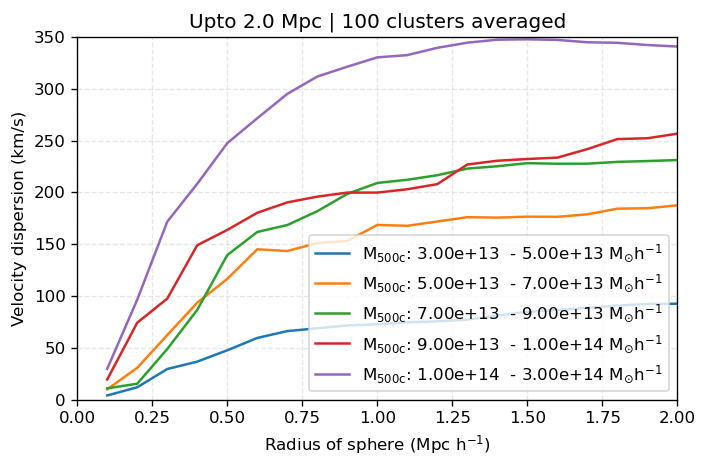

In [32]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 2000
radi = np.arange(100, max_extent + 1, 100)

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    velocity_dispersion(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Velocity dispersion (km/s)')
plt.legend()
plt.ylim(0, 350)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 34.5 s, sys: 520 ms, total: 35 s
Wall time: 16 s


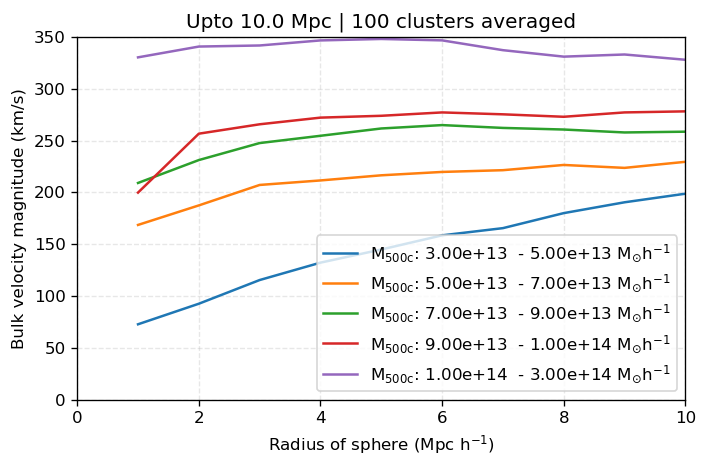

In [33]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

max_extent = 10000
radi = np.arange(1000, max_extent + 1, 1000)

n_clusters = 100
# n_clusters = 2

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    velocity_dispersion(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
plt.ylim(0, 350)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 12min 16s, sys: 39.5 s, total: 12min 55s
Wall time: 4min 10s


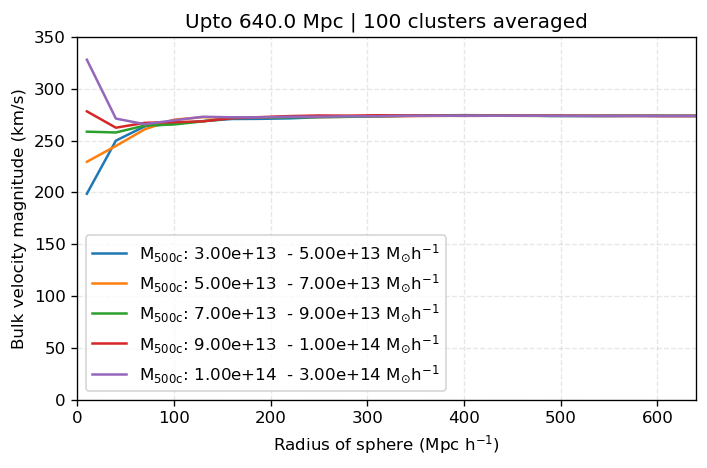

In [34]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

max_extent = 640000
radi = np.arange(10000, max_extent + 1, 30000)

n_clusters = 100
# n_clusters = 2

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    velocity_dispersion(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
plt.ylim(0, 350)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

In [109]:
def bulk_velocity_second_approach(gray_shade, low_lim, upper_lim, df_clusters_inner, radi, max_extent):

    v_bulk_x = np.zeros(radi.shape)
    v_bulk_y = np.zeros(radi.shape)
    v_bulk_z = np.zeros(radi.shape)
        
    v_bulk_mag = np.zeros((n_clusters, radi.shape[0]))
#     gal_no = np.zeros(n_clusters, radi.shape)
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, random_state = 0)    
    random_clusters = random_clusters.reset_index(drop = True)
    
    for j, random_cluster in random_clusters.iterrows():
        
        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        df_gal_cube.insert(4, 'y_shift[kpc/h]', df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        df_gal_cube.insert(5, 'z_shift[kpc/h]', df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                                        df_gal_cube['y_shift[kpc/h]']**2 +
                                                        df_gal_cube['z_shift[kpc/h]']**2))
  

        for i, r in enumerate(radi):

            df_gal_sphere = df_gal_cube[df_gal_cube['dist_from_clus'] <= r]

            v_gal_sphere_mag = np.sqrt(df_gal_sphere['vx[km/s]']**2 +  
                                       df_gal_sphere['vy[km/s]']**2 +
                                       df_gal_sphere['vz[km/s]']**2)
            
            v_bulk_mag[j,i] = (np.sum(df_gal_sphere['m[Msol/h]'] * v_gal_sphere_mag) / 
                               np.sum(df_gal_sphere['m[Msol/h]']))
            
#             v_bulk_mag[j,i] = np.sum(v_gal_sphere_mag) / len(df_gal_sphere)
        
            
    
    
#             v_bulk_x[i] = (np.sum(df_gal_sphere['vx[km/s]'] * df_gal_sphere['m[Msol/h]']) / 
#                                np.sum(df_gal_sphere['m[Msol/h]']))


#             v_bulk_y[i] = (np.sum(df_gal_sphere['vy[km/s]'] * df_gal_sphere['m[Msol/h]']) / 
#                                np.sum(df_gal_sphere['m[Msol/h]']))


#             v_bulk_z[i] = (np.sum(df_gal_sphere['vz[km/s]'] * df_gal_sphere['m[Msol/h]']) / 
#                                np.sum(df_gal_sphere['m[Msol/h]']))



#         v_bulk_mag[j,:] = np.sqrt(v_bulk_x**2 + v_bulk_y**2 + v_bulk_z**2)
    
    
    plt.plot(radi/1e3, v_bulk_mag.mean(axis = 0), 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')

CPU times: user 1min 22s, sys: 961 ms, total: 1min 23s
Wall time: 36.8 s


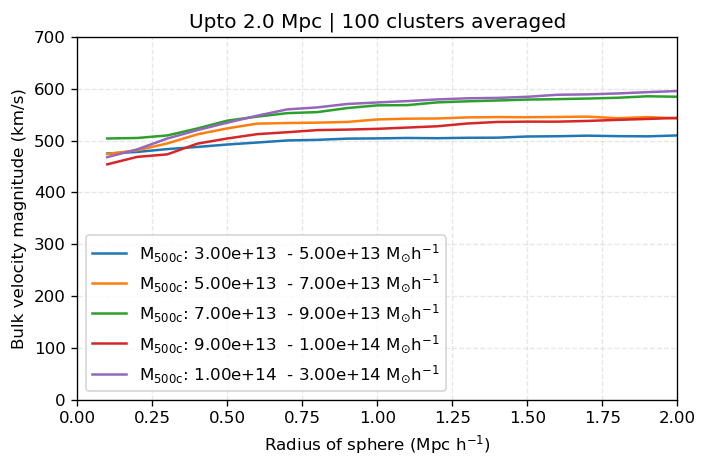

In [111]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

max_extent = 2000
radi = np.arange(100, max_extent + 1, 100)

n_clusters = 100
# n_clusters = 2

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_second_approach(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
plt.ylim(0, 700)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 41.9 s, sys: 635 ms, total: 42.5 s
Wall time: 20.1 s


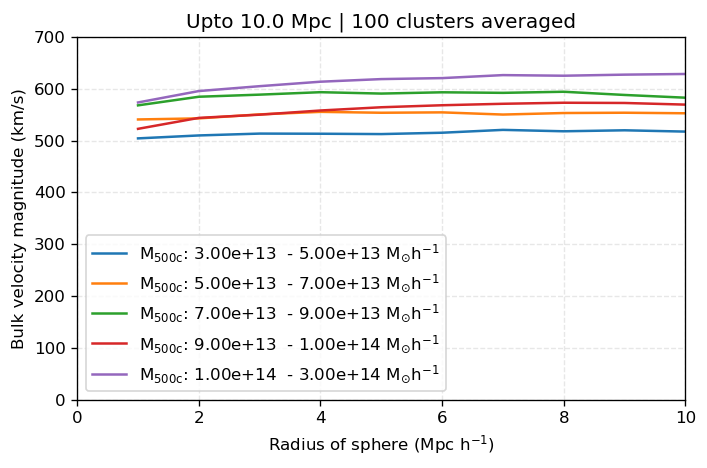

In [110]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

max_extent = 10000
radi = np.arange(1000, max_extent + 1, 1000)

n_clusters = 100
# n_clusters = 2

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_second_approach(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
plt.ylim(0, 700)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 3h 21min 25s, sys: 10min 3s, total: 3h 31min 29s
Wall time: 4min 14s


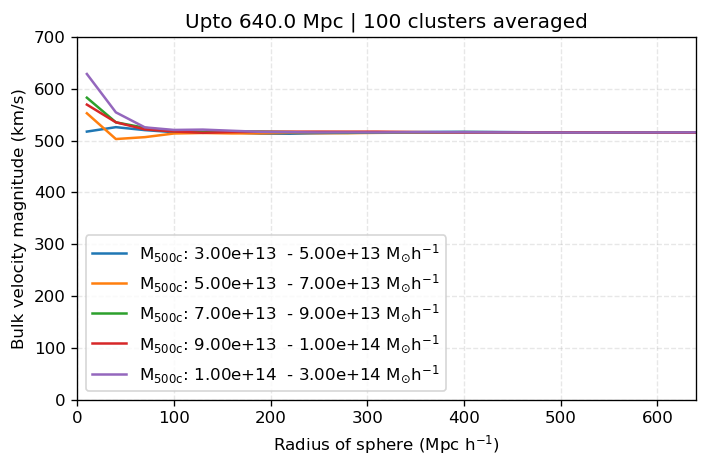

In [112]:
%%time

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

max_extent = 640000
radi = np.arange(10000, max_extent + 1, 30000)

n_clusters = 100
# n_clusters = 2

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_center[(df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                              (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_second_approach(gray_shades[i],mass_ranges[i], mass_ranges[i+1],
                                    df_clusters_center[
                                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                                    radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
plt.ylim(0, 700)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')